In [63]:
#load libraries
from sklearn import datasets, model_selection, preprocessing, tree, metrics, ensemble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
user_df=pd.read_csv("User_Data.csv")

In [3]:
#view dataset structure
user_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#define X and y variables
X=user_df[["Gender","Age","EstimatedSalary"]]
y=user_df["Purchased"]

#transform gender to numerical values
le = preprocessing.LabelEncoder()
le.fit(X["Gender"])
X["Gender"]=le.transform(X["Gender"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [7]:
#split dataset into training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state=12)

### Decision Tree Classifier

In [56]:
#create decisionTreeClassifier algorithm
clt=tree.DecisionTreeClassifier(random_state=12,max_depth=5)
clt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [57]:
#predict y values using testing data
y_pred_clt=clt.predict(X_test)

In [58]:
#calculate confussion matrix
cm=metrics.confusion_matrix(y_test,y_pred_clt)
cm

array([[40,  8],
       [ 6, 26]], dtype=int64)

In [59]:
#showing classification report 
print(metrics.classification_report(y_test,y_pred_clt))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



[Text(983.1428571428572, 498.3, 'Age <= 42.5\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(425.14285714285717, 407.70000000000005, 'EstimatedSalary <= 90500.0\ngini = 0.259\nsamples = 235\nvalue = [199, 36]'),
 Text(212.57142857142858, 317.1, 'Age <= 36.5\ngini = 0.067\nsamples = 201\nvalue = [194, 7]'),
 Text(106.28571428571429, 226.5, 'gini = 0.0\nsamples = 132\nvalue = [132, 0]'),
 Text(318.8571428571429, 226.5, 'EstimatedSalary <= 83500.0\ngini = 0.182\nsamples = 69\nvalue = [62, 7]'),
 Text(212.57142857142858, 135.89999999999998, 'EstimatedSalary <= 77500.0\ngini = 0.138\nsamples = 67\nvalue = [62, 5]'),
 Text(106.28571428571429, 45.299999999999955, 'gini = 0.069\nsamples = 56\nvalue = [54, 2]'),
 Text(318.8571428571429, 45.299999999999955, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(425.14285714285717, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(637.7142857142858, 317.1, 'Age <= 26.5\ngini = 0.251\nsamples = 34\nvalue = [5, 29]'),
 T

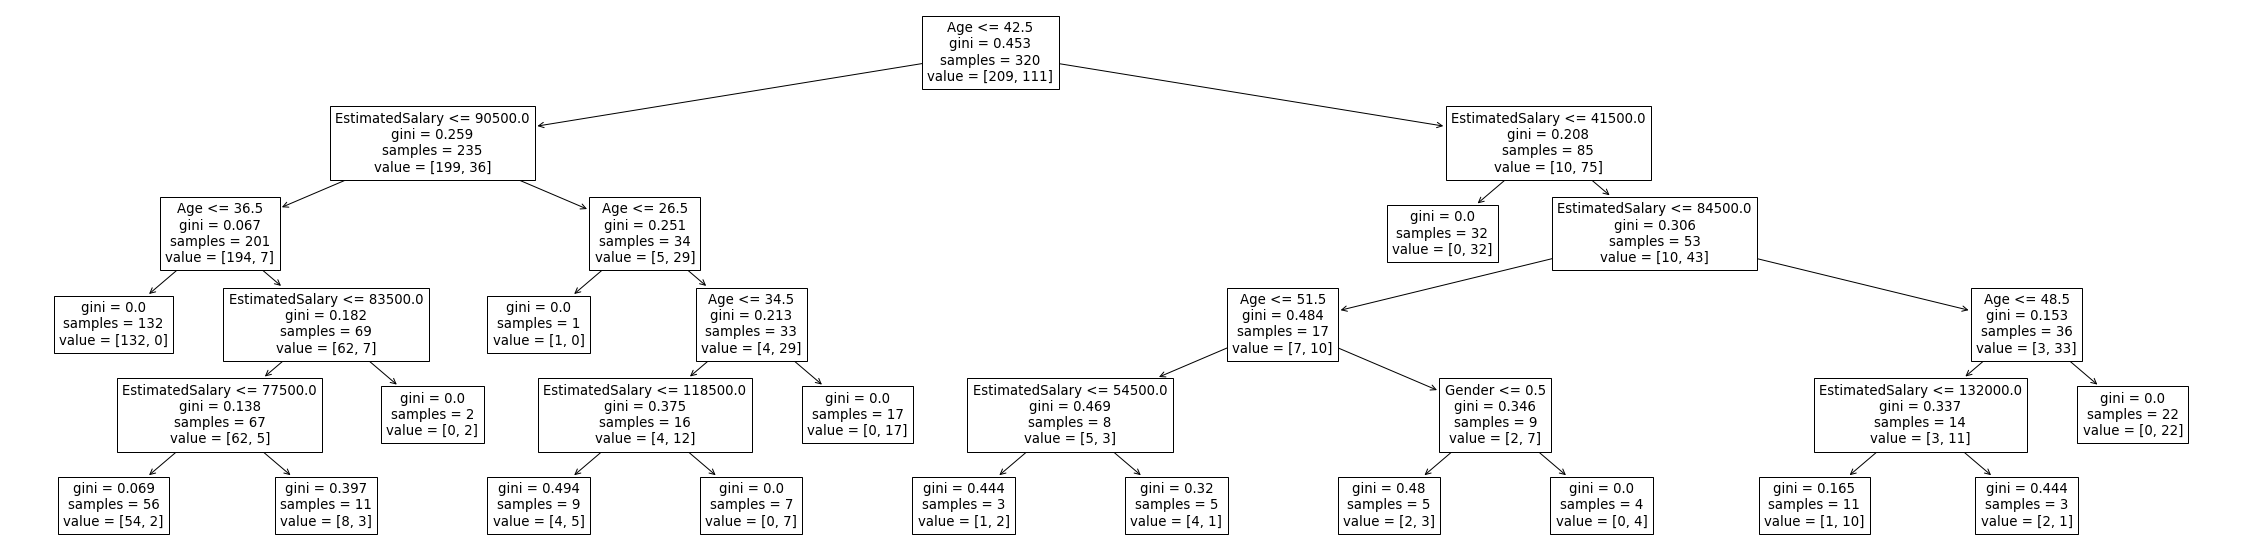

In [62]:
#plot tree

fig, ax = plt.subplots(figsize=(40,10))
tree.plot_tree(clt,ax=ax,feature_names=X.columns)

### Random Forest Classifier

In [72]:
rfc=ensemble.RandomForestClassifier(n_estimators = 50,max_depth=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred_rfc=rfc.predict(X_test)

In [74]:
metrics.confusion_matrix(y_test,y_pred_rfc)

array([[38, 10],
       [ 3, 29]], dtype=int64)

In [75]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.74      0.91      0.82        32

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80



[Text(1858.6323529411764, 498.3, 'Gender <= 0.5\ngini = 0.464\nsamples = 199\nvalue = [203, 117]'),
 Text(1009.3235294117646, 407.70000000000005, 'Age <= 42.5\ngini = 0.484\nsamples = 99\nvalue = [93, 65]'),
 Text(492.3529411764706, 317.1, 'EstimatedSalary <= 92500.0\ngini = 0.243\nsamples = 67\nvalue = [85, 14]'),
 Text(196.94117647058823, 226.5, 'EstimatedSalary <= 79500.0\ngini = 0.023\nsamples = 59\nvalue = [84, 1]'),
 Text(98.47058823529412, 135.89999999999998, 'gini = 0.0\nsamples = 48\nvalue = [72, 0]'),
 Text(295.4117647058823, 135.89999999999998, 'Age <= 41.5\ngini = 0.142\nsamples = 11\nvalue = [12, 1]'),
 Text(196.94117647058823, 45.299999999999955, 'gini = 0.0\nsamples = 10\nvalue = [12, 0]'),
 Text(393.88235294117646, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(787.7647058823529, 226.5, 'EstimatedSalary <= 125000.0\ngini = 0.133\nsamples = 8\nvalue = [1, 13]'),
 Text(689.2941176470588, 135.89999999999998, 'Age <= 32.5\ngini = 0.245\nsamples = 4\nv

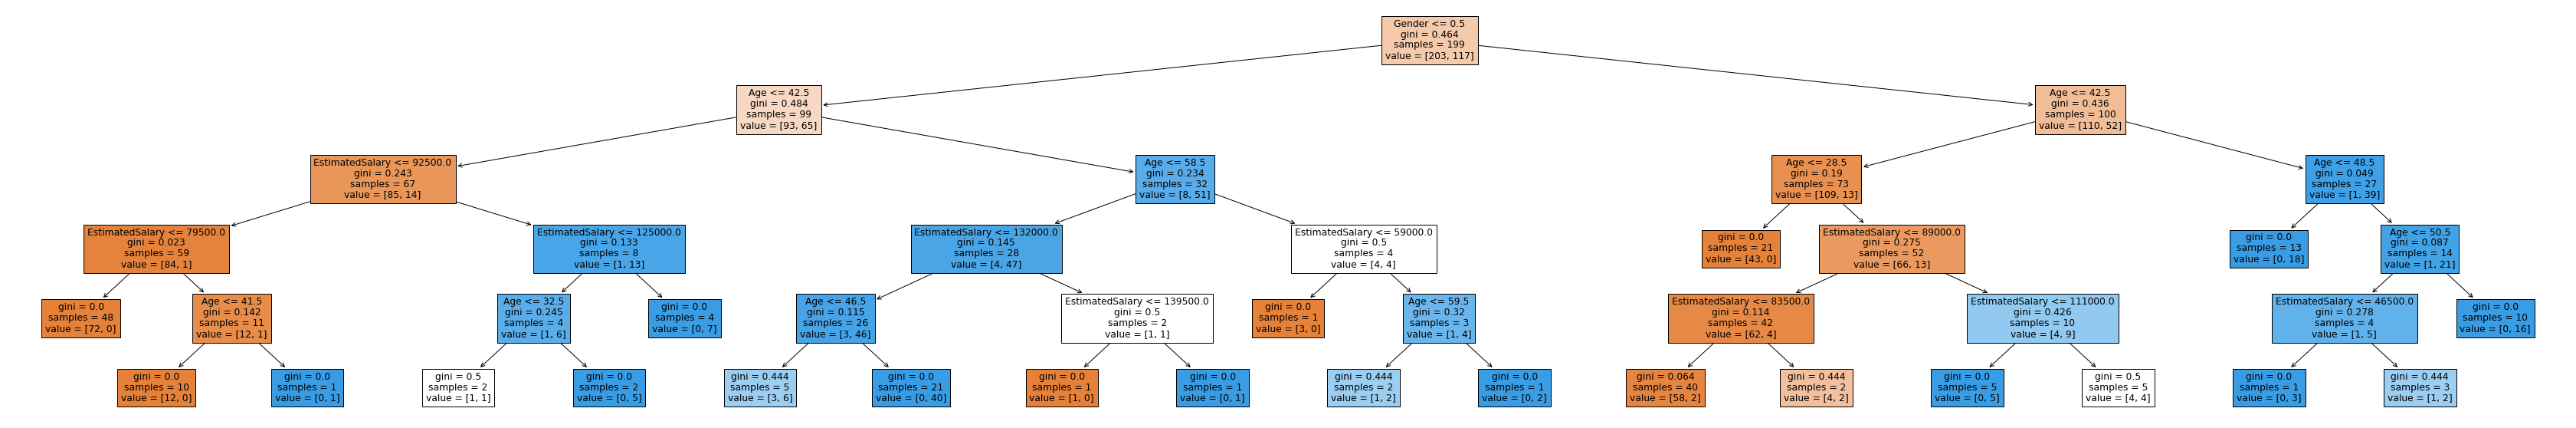

In [79]:
fig, ax = plt.subplots(figsize=(60,10))
tree.plot_tree(rfc.estimators_[0],ax=ax,feature_names=X.columns,filled=True)